# **Wykład 1: Analiza danych - wprowadzenie**

W dzisiejszym świecie mamy dostęp do ogromnych ilości danych, ale same dane nie mają wartości, dopóki nie zostaną odpowiednio przeanalizowane. Analiza danych pozwala na wyciąganie użytecznych wniosków, przewidywanie trendów i podejmowanie lepszych decyzji biznesowych i naukowych. Bez niej firmy, naukowcy i instytucje nie mogłyby efektywnie działać i rozwijać się.

Analiza danych to jeden z procesów przetwarzania danych, który umożliwia uzyskanie na ich podstawie użytecznych wniosków i informacji. Analiza danych na ogół składa się z etapów eksploracyjnych i statystycznych.



### **Przykłady zastosowania analizy danych w rzeczywistych scenariuszach**

#### 1. Rekomendacje na Netflixie i Spotify
Serwisy streamingowe, takie jak **Netflix**, **Spotify** czy **YouTube**, wykorzystują analizę danych do personalizacji treści dla użytkowników. Jak to działa?
- **Gromadzenie danych** – systemy zbierają informacje o oglądanych filmach, ulubionych gatunkach, czasie spędzonym na danej produkcji, a także o tym, czy użytkownik przerwał oglądanie.
- **Uczenie maszynowe** – modele przewidują, które filmy lub utwory muzyczne mogą spodobać się użytkownikowi na podstawie jego wcześniejszych wyborów i preferencji podobnych osób.
- **Systemy rekomendacyjne** – algorytmy takie jak **collaborative filtering** (analiza podobieństwa użytkowników) oraz **content-based filtering** (analiza cech filmów i utworów) sugerują treści, które mogą być interesujące.

Dzięki analizie danych użytkownicy chętniej korzystają z platform, a firmy zwiększają zaangażowanie klientów i zyski.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [6]:
# System rekomendacji (cosine similarity)
ratings = np.array([
    [5, 3, 4, 4],
    [3, 1, 2, 3],
    [4, 3, 4, 5],
    [3, 3, 1, 2],
    [1, 5, 5, 2]
])
user_similarity = cosine_similarity(ratings)
user_sim_df = pd.DataFrame(user_similarity, columns=[f'User {i+1}' for i in range(len(ratings))],
                           index=[f'User {i+1}' for i in range(len(ratings))])
print("Macierz podobieństwa użytkowników:\n", user_sim_df, "\n")

Macierz podobieństwa użytkowników:
           User 1    User 2    User 3    User 4    User 5
User 1  1.000000  0.975321  0.984848  0.923989  0.796687
User 2  0.975321  1.000000  0.975321  0.869565  0.674786
User 3  0.984848  0.975321  1.000000  0.898322  0.813285
User 4  0.923989  0.869565  0.898322  1.000000  0.759134
User 5  0.796687  0.674786  0.813285  0.759134  1.000000 




#### 2. Wykrywanie oszustw bankowych
Banki i instytucje finansowe stosują analizę danych do wykrywania podejrzanych transakcji i oszustw finansowych.
- **Monitorowanie transakcji w czasie rzeczywistym** – systemy analizują miliony transakcji i wykrywają anomalie.
- **Uczenie maszynowe i modele statystyczne** – np. algorytmy klasyfikacji potrafią oznaczyć podejrzane operacje na podstawie wcześniejszych przypadków oszustw.
- **Analiza zachowań klientów** – jeśli klient zazwyczaj dokonuje zakupów w Polsce, a nagle jego karta jest używana na drugim końcu świata, system może zablokować transakcję i poprosić o potwierdzenie.

Redukcja strat finansowych i większe bezpieczeństwo klientów.

In [8]:
# Wykrywanie oszustw bankowych (Isolation Forest)
data = np.array([
    [100, 2],
    [200, 3],
    [150, 1],
    [5000, 30],
    [120, 2],
    [300, 4],
    [7000, 50]
])

from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.2, random_state=42)
model.fit(data)
predictions = model.predict(data)
df_fraud = pd.DataFrame(data, columns=["Kwota", "Liczba transakcji"])
df_fraud["Oszustwo"] = ["Tak" if p == -1 else "Nie" for p in predictions]
print("Wykrywanie oszustw bankowych:\n", df_fraud, "\n")

Wykrywanie oszustw bankowych:
    Kwota  Liczba transakcji Oszustwo
0    100                  2      Nie
1    200                  3      Nie
2    150                  1      Nie
3   5000                 30      Tak
4    120                  2      Nie
5    300                  4      Nie
6   7000                 50      Tak 





#### 3. Analiza danych medycznych
W medycynie analiza danych ma ogromne znaczenie dla diagnozowania chorób, przewidywania epidemii i poprawy skuteczności leczenia.
- **Analiza obrazów medycznych** – algorytmy uczą się rozpoznawać choroby na podstawie zdjęć RTG, tomografii czy MRI.
- **Predykcja ryzyka chorób** – na podstawie historii pacjentów i czynników genetycznych modele potrafią przewidzieć ryzyko wystąpienia choroby (np. cukrzycy, raka).
- **Optymalizacja leczenia** – analiza danych pomaga lekarzom dostosować leczenie do indywidualnych potrzeb pacjenta.

Szybsze i dokładniejsze diagnozy, lepsza opieka zdrowotna.

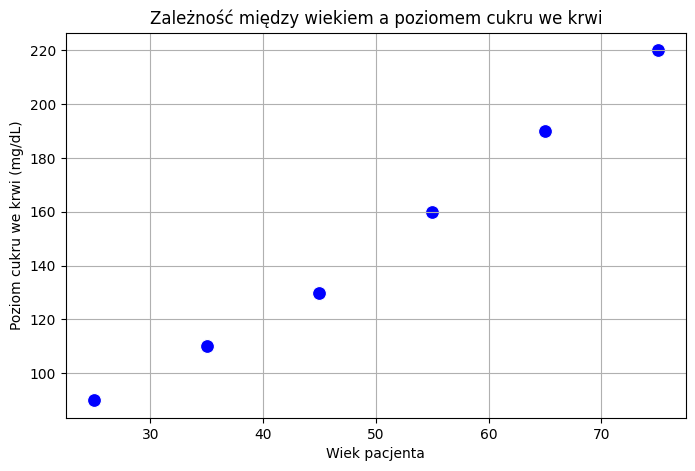

In [11]:
# Analiza medyczna (wykres zależności wieku i poziomu cukru)
wiek = [25, 35, 45, 55, 65, 75]
poziom_cukru = [90, 110, 130, 160, 190, 220]
plt.figure(figsize=(8,5))
sns.scatterplot(x=wiek, y=poziom_cukru, marker='o', color='b', s=100)
plt.xlabel("Wiek pacjenta")
plt.ylabel("Poziom cukru we krwi (mg/dL)")
plt.title("Zależność między wiekiem a poziomem cukru we krwi")
plt.grid()
plt.show()




#### 4. Analiza ruchu drogowego i nawigacja GPS
Aplikacje nawigacyjne, takie jak **Google Maps, Waze czy Yanosik**, wykorzystują analizę danych do optymalizacji tras przejazdu i przewidywania korków.
- **Dane z czujników i GPS** – aplikacje zbierają dane o prędkości poruszania się pojazdów w czasie rzeczywistym.
- **Analiza historycznych wzorców ruchu** – na podstawie wcześniejszych danych system przewiduje korki w określonych godzinach.
- **Predykcja czasu dojazdu** – algorytmy szacują, ile czasu zajmie podróż i sugerują alternatywne trasy.

Oszczędność czasu, zmniejszenie korków, lepsza płynność ruchu.


In [ ]:
# Predykcja korków drogowych (wykres ruchu)
godzina = ["06:00", "07:00", "08:00", "09:00", "10:00", "11:00"]
natężenie_ruchu = [30, 70, 150, 120, 60, 40]
plt.figure(figsize=(8,5))
plt.plot(godzina, natężenie_ruchu, marker='o', linestyle='-', color='r')
plt.xlabel("Godzina dnia")
plt.ylabel("Liczba pojazdów na minutę")
plt.title("Predykcja korków w godzinach porannych")
plt.grid()
plt.show()

#### 5. Analiza danych w informatyce – porównanie klasycznej analizy i uczenia maszynowego


In [13]:
# Analiza Titanic - klasyczna analiza i uczenie maszynowe
df_titanic = sns.load_dataset("titanic")
survival_rate = df_titanic.groupby("sex")["survived"].mean()
print("Średni wskaźnik przeżycia wg płci:\n", survival_rate, "\n")

df_titanic = df_titanic[["sex", "age", "fare", "survived"]].dropna()
df_titanic["sex"] = LabelEncoder().fit_transform(df_titanic["sex"])
X = df_titanic[["sex", "age", "fare"]]
y = df_titanic["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Dokładność modelu predykcyjnego: {accuracy:.2f}")


Średni wskaźnik przeżycia wg płci:
 sex
female    0.742038
male      0.188908
Name: survived, dtype: float64 

Dokładność modelu predykcyjnego: 0.75




### **Rola analizy danych w zawodzie informatyka – jak różni się od tradycyjnej statystyki?**
W tradycyjnej statystyce celem jest formułowanie i testowanie hipotez przy użyciu metod matematycznych. Informatycy zajmujący się analizą danych często idą o krok dalej:
- **Więcej danych** – informatycy pracują na ogromnych zbiorach danych (Big Data), podczas gdy statystyka często koncentruje się na mniejszych próbkach.
- **Uczenie maszynowe** – w analizie danych stosuje się algorytmy, które uczą się na podstawie wzorców, zamiast ręcznie formułować modele.
- **Automatyzacja procesów** – w informatyce kluczowe jest przetwarzanie i analizowanie danych w sposób zautomatyzowany (np. z użyciem języka Python i bibliotek takich jak Pandas, NumPy, Scikit-learn).

Informatycy nie tylko analizują dane, ale również wdrażają modele predykcyjne i automatyczne systemy podejmowania decyzji.


### **Data Science, Big Data i Sztuczna Inteligencja – gdzie się łączy z analizą danych?**

**Data Science** – szeroka dziedzina obejmująca analizę danych, programowanie i statystykę. Obejmuje proces **zbierania, przetwarzania, analizy i wizualizacji danych** oraz budowania modeli predykcyjnych.

**Big Data** – analiza ogromnych zbiorów danych, które są zbyt duże, aby można było je przetwarzać tradycyjnymi metodami. Przykłady:
- Dane z sieci społecznościowych (Facebook, Twitter).
- Logi serwerów i aplikacji internetowych.
- Informacje o transakcjach w bankach i sklepach.

**Sztuczna Inteligencja (AI)** – wykorzystuje analizę danych do nauki i podejmowania decyzji. Wykorzystywane są tu techniki takie jak:
- **Uczenie maszynowe** – algorytmy potrafią uczyć się na podstawie danych i podejmować decyzje bez ludzkiej interwencji.
- **Uczenie głębokie (Deep Learning)** – zaawansowane modele AI naśladujące działanie ludzkiego mózgu.

Wszystkie te dziedziny są ze sobą powiązane i bazują na analizie danych jako kluczowym elemencie.



## Analiza eksploracyjna

**Analiza eksploracyjna danych** (ang. Exploratory Data Analysis, EDA) to jeden z pierwszych kroków w pracy z danymi. Jej celem jest lepsze zrozumienie zestawu danych – sprawdzenie, jakie są w nim wzorce, czy występują jakieś błędy oraz jakie zależności można zauważyć.

Tradycyjna statystyka skupiała się głównie na wnioskowaniu na temat dużych populacji na podstawie niewielkich próbek. W latach 60. XX wieku amerykański statystyk John W. Tukey zauważył, że analiza danych powinna obejmować nie tylko skomplikowane obliczenia, ale także bardziej intuicyjne metody eksploracji. W swojej pracy The Future of Data Analysis zaproponował nową dziedzinę – analizę danych, której częścią jest analiza eksploracyjna.

Tukey wprowadził wiele narzędzi, które do dziś są podstawą analizy danych. Należą do nich:
  - proste wykresy, takie jak wykresy pudełkowe (box plot) czy punktowe (scatter plot), a także
  - podstawowe statystyki opisowe, np. średnia, mediana czy kwartyle. Dzięki nim można szybko zobaczyć, jak wyglądają dane i jakie mają właściwości.
To właśnie na tej podstawie buduje się wiele metod stosowanych w dzisiejszym data science.

Wraz z ułatwieniem dostępu do mocy obliczeniowej i oprogramowania dedykowanego analizie danych badania eksploracyjne wyszły poza ich oryginalne założenia. Głównym motorem napędowym były:
 - gwałtowny rozwój nowych technologii,
 - łatwy dostęp do większej liczby dużych zbiorów danych i
 - zwiększenie możliwości wykorzystania analizy ilościowej w różnych dyscyplinach naukowych.

David Donoho, profesor statystyki na Uniwersytecie Stanforda i były student Tukeya, jest autorem świetnego artykułu bazującego na jego prezentacji z warsztatów zorganizowanych z okazji setnej rocznicy urodzin Tukeya, które odbyły się na Uniwersytecie Princeton w New Jersey. Donoho prześledził w swojej pracy początki data science, aż do pionierskiej pracy Tukeya dotyczącej analizy danych.

## Analiza statystyczna

Analiza statystyczna to proces **zbierania** i **analizowania danych** w celu określenia wzorców i trendów. Jest to metoda polegająca na używaniu liczb, aby spróbować wyeliminować wszelkie tendencje stronnicze podczas przeglądania informacji. Może być również postrzegana jako narzędzie naukowe, które może pomóc w podejmowaniu decyzji.

Istnieją dwa główne rodzaje analizy statystycznej: **opisowa** i **wnioskowa**.

**Statystyka opisowa** jest tym, co organizacje wykorzystują do podsumowania swoich danych. Mają na celu opisanie dużej ilości uzyskanych informacji za pomocą różnego rodzaju tabel oraz wykresów podsumowujących, ale starają się nie wyciągać wniosków na temat badanej populacji. Podsumowują zebrane informacje za pomocą **diagramów**. W tym opracowaniu znajdziemy kluczowe wyniki dotyczące badanego zjawiska. Ponieważ wykresy, schematy i tabele są podstawowymi składnikami statystyki opisowej to ułatwiają **zrozumienie** i wizualizację surowych danych. Osoby analizujące **nie wyciągają wniosków** wykraczających poza analizowane dane. Wśród niektórych przydatnych danych, które pochodzą ze statystyk opisowych, znajdują się m.in. **mediana** i **średnia**, a także **wariancja** i **odchylenie standardowe**.

Drugim rodzajem analizy statystycznej jest **wnioskowanie**. Statystyki interferencyjne są sposobem na dalsze badanie danych. Statystyka inferencyjna pozwala organizacjom na **przetestowanie hipotezy** i wyciągnięcie wniosków na temat danych. W takich przypadkach zwykle bada się próbę całych danych, a wyniki stosuje się do grupy, jako całości.


## Dane uporządkowane

Dane mogą pochodzić z różnych źródeł; mogą to być na przykład:
- pomiary z czujników,
- wydarzeń,
- tekstu,
- obrazów,
- filmów.
-
 Internet rzeczy (IoT, ang. Internet of Things) wyrzuca potoki informacji. Większość tych danych jest nieuporządkowana: **obrazy** są zbiorem pikseli, a każdy piksel zawiera informacje o kanałach RGB (ang. R(ed) — czerwony, G(reen) — zielony, B(lue) — niebieski).
         -
  **Tekst** jest sekwencją słów i znaków, zazwyczaj uporządkowanych w rozdziały, podrozdziały itd. Z kolei **clickstreams** są sekwencjami przechodzenia przez kolejne elementy aplikacji lub podstrony strony internetowej.

Tak naprawdę największym wyzwaniem data science jest **przekształcenie** wciąż spływającego **natłoku danych w użyteczne informacje**. Aby zagadnienia statystyczne, które podczas zajęć poruszymy, mogły zostać zastosowane w praktyce, **nieuporządkowane** dane muszą być przekształcone na **uporządkowane**.

Jedną z najczęściej występujących form **danych uporządkowanych** jest **tabela** zawierająca rzędy i kolumny — tak jakby dane pochodziły z relacyjnej bazy danych lub były zbierane w celach badawczych.


Istnieją dwa podstawowe typy danych **uporządkowanych**:
- **numeryczne** i
- **skategoryzowane**.

**Dane numeryczne** występują w dwóch formach:
- **ciągłej**, np. prędkość wiatru, czas trwania, lub
- **dyskretnej**, np. częstość występowania jakiegoś zjawiska.

**Dane skategoryzowane** (ang. categorical data) przyjmują jedynie określone zbiory wartości, np. typy ekranów telewizorów (plazmowy, LCD, LED itp.) lub nazwy stanów (Alabama, Alaska itd.).

**Dane binarne** (ang. binary data) są ważnym, szczególnym przypadkiem danych skategoryzowanych, w którym występują jedynie dwie wartości, tj. 0/1 lub prawda/fałsz.

Innym użytecznym rodzajem danych skategoryzowanych są **dane porządkowe** (ang. ordinal data), w których kategorie są uporządkowane; przykładem jest ocenianie na podstawie ocen (1, 2, 3, 4 lub 5).

Dlaczego w ogóle przejmujemy się nazewnictwem typów danych? Okazuje się, że w przypadku analizy danych i modelowania predykcyjnego typy danych są istotne dla określenia sposobu ich wizualizacji, analizy i doboru modelu statystycznego. W świecie data science oprogramowanie, jak R lub Python, wykorzystuje te typy do poprawy wydajności obliczeń. Co ważniejsze, określenie typu danych dla zmiennej warunkuje sposób, w jaki oprogramowanie będzie przetwarzać tę zmienną.



## Dane tabelaryczne

Typowym przykładem analizy w data science są dane stabelaryzowane (ang. rectangular data), takie jak arkusz kalkulacyjny lub tabela bazy danych.

Dane stabelaryzowane to w gruncie rzeczy dwuwymiarowa macierz, w której wiersze reprezentują rekordy (przypadki), a kolumny określają cechy (zmienne); w R i Pythonie występuje szczególny format, zwany ramką danych (ang. data frame). Dane nie zawsze od razu wstępują w tej formie: dane nieuporządkowane (np. tekst) muszą być przetworzone w taki sposób, by reprezentowały zestaw cech danych stabelaryzowanych. Do zastosowań w większości typów analiz i modelowania dane z relacyjnych baz danych muszą przyjąć formę jednej tabeli.

## Kluczowe pojęcia związane z typami danych
- **ramka danych**: dane stabelaryzowane (jak arkusz kalkulacyjny) są podstawową strukturą w statystyce i modelach uczenia maszynowego
- **cecha**: kolumna w tabeli jest najczęściej nazywana cechą. Synonimy: atrybut, wejście, predyktor, zmienna.
- **wynik**: wiele projektów w data science służy do przewidzenia wyniku — zazwyczaj w postaci tak/nie. Cechy są czasem wykorzystywane do przewidzenia wyniku w badaniach eksperymentalnych. Synonimy: zmienna zależna, odpowiedź, cel, wyjście.
- **rekord**: wiersz w tabeli jest najczęściej nazywany rekordem. Synonimy: przypadek, przykład, instancja, obserwacja, wzorzec, próbka, obiekt.



## Standardowy proces analizy danych

Proces analizy danych polega na badaniu danych, uzyskiwaniu na ich podstawie spostrzeżeń i wyciąganiu z nich wniosków. Głównym celem tego procesu jest **zbieranie, filtrowanie, oczyszczanie, przekształcanie, przeglądanie, opisywanie i wizualizowanie danych** oraz przekazywanie tych spostrzeżeń w celu odkrywania informacji pomagających w podejmowaniu
decyzji. Zasadniczo proces analizowania danych składa się z następujących etapów:

1. **Zbieranie danych** – pozyskiwanie danych z różnych źródeł.
2. **Wstępne przetwarzanie** – filtrowanie, oczyszczanie i przekształcanie danych.
3. **Analizowanie danych** – opisywanie, wizualizacja i wyszukiwanie spostrzeżeń.
4. **Interpretowanie wyników** – określanie wpływu zmiennych na dany system.
5. **Prezentacja wyników** – storytelling, czyli przekształcanie wyników w zrozumiałą historię.


## Proces KDD (Knowledge Discovery from Data)

KDD - knowledge discovery from data, czyli „odkrywanie wiedzy z danych” lub Knowledge Discovery in Databases („odkrywanie wiedzy w bazach danych”). Dla wielu
osób proces KDD jest synonimem wydobywania danych (ang. data mining). Wydobywaniem
danych nazywamy proces odkrywania wiedzy z interesujących wzorów danych. Głównym celem procesu KDD jest wydobywanie lub odkrywanie ukrytych, interesujących wzorów z dużych baz danych, hurtowni danych oraz innych repozytoriów informacji.

Proces KDD składa się z siedmiu głównych etapów:
1. **Oczyszczanie danych** – usuwanie błędów, brakujących wartości, anomalii.
2. **Integrację danych** – łączenie danych z różnych źródeł.
3. **Dobór danych** – wybór istotnych informacji.
4. **Przekształcanie danych** – przygotowanie danych do analizy.
5. **Wydobywanie danych** – stosowanie technik eksploracji danych (data mining).
6. **Ocena wzorców** – analiza odkrytych wzorców.
7. **Prezentacja wyników** – wizualizacja i interpretacja danych.

KDD jest procesem iteracyjnym służącym poprawie jakości danych, a także ich integracji i przekształcaniu w celu usprawnienia systemu.



## Proces SEMMA

Skrót SEMMA rozwijamy jako Sample, Explore, Modify, Model, Assess (czyli „próbkuj, eksploruj, modyfikuj, modeluj, oceniaj”). Ten sekwencyjny proces wydobywania danych został opracowany przez instytut SAS.

Jest on pięcioetapowy:
- **Sample (Próbkuj)** – wybór odpowiedniej próbki danych.
- **Explore (Eksploruj)** – analiza i wizualizacja danych.
- **Modify (Modyfikuj)** – oczyszczanie i przekształcanie danych.
- **Model (Modeluj)** – tworzenie modeli analitycznych.
- **Assess (Oceniaj)** – testowanie i ocena modeli predykcyjnych.

Kluczowymi etapami są tutaj tworzenie modelu i jego ocena.


## Proces CRISP-DM

Skrót CRISP-DM rozwijamy jako CRoss-InduStry Process for Data Mining (czyli „międzybranżowy proces wydobywania danych”). Jest to precyzyjnie zdefiniowany, ustrukturyzowany i skuteczny proces stosowany w projektach uczenia maszynowego, wydobywania danych i analizy biznesowej. Stanowi on solidną, elastyczną, cykliczną, przydatną i praktyczną metodologię rozwiązywania problemów biznesowych. Proces ten odkrywa niewidoczne, a przydatne informacje lub wzory z kilku baz danych.

Na CRISP-DM składa się sześć głównych etapów:
1. **Zrozumienie potrzeb biznesowych** – definiowanie problemu.
2. **Zrozumienie danych** – analiza jakości i struktury danych.
3. **Przygotowanie danych** – normalizacja, inżynieria cech.
4. **Modelowanie** – wybór technik analizy.
5. **Ocena modeli** – testowanie skuteczności.
6. **Wdrożenie** – implementacja w systemach produkcyjnych.

![alt text](crisp.png "Title")


Standardowy proces kładzie nacisk na odkrywanie spostrzeżeń i przygotowywanie ich interpretacji w formie historyjek, natomiast proces KDD koncentruje się na odkrywaniu wzorów danych i ich wizualizowaniu. W procesie **SEMMA** skupiamy się na zadaniach tworzenia modelu, natomiast w procesie **CRISP-DM** najważniejsze są zrozumienie potrzeb biznesowych oraz wdrażanie.


## Analiza danych vs Data Science

**Analiza danych** (ang. data analysis) jest procesem poznawania danych w celu odkrycia wzorów pomagających w podejmowaniu decyzji biznesowych. Stanowi ona jedną z dziedzin **danetyki** (ang. data science).

Metody i narzędzia **analizy danych** są powszechnie stosowane w różnych kategoriach biznesowych przez analityków biznesowych, analityków danych i badaczy. Jej głównym celem jest zwiększanie produktywności i zysków.

**Analityk danych:**
- wydobywa i sprawdza dane z różnych źródeł,
- realizuje eksploracyjną analizę danych,
- wizualizuje dane,
- przygotowuje raporty i prezentuje je kadrom kierowniczym.

Z kolei **danetyka** stanowi interdyscyplinarną dziedzinę wykorzystującą **metody naukowe** do wydobywania spostrzeżeń z danych ustrukturyzowanych i nieustrukturyzowanych. Składa się na nią wiele dziedzin, takich jak analiza danych, wydobywanie danych, uczenie maszynowe itp.

**Danetyka** nie ogranicza się jedynie do eksploracyjnej analizy danych i jest stosowana w tworzeniu modeli i algorytmów predykcyjnych w takich kategoriach jak prognozy cen akcji, pogody, epidemii czy oszustw, a także rekomendacje filmów, książek czy muzyki.



Role analityka danych i danetyka
Analityk danych zbiera, filtruje, przetwarza i wykorzystuje wymagane pojęcia statystyczne do wyłapywania wzorów, trendów i spostrzeżeń z danych, a także przygotowuje raporty przeznaczone dla decydentów. Głównym zadaniem analityka danych jest pomaganie firmom w rozwiązywaniu problemów biznesowych za pomocą odkrytych wzorów i trendów. Analityk danych ocenia także jakość danych i rozwiązuje problemy związane z ich pozyskiwaniem. Osoba taka powinna być biegła w tworzeniu kwerend SQL-a, wyszukiwaniu wzorów, korzystaniu z narzędzi wizualizacji, a także stosowaniu narzędzi raportujących, takich jak Microsoft Power
BI, IBM Cognos, Tableau, QlikView, Oracle BI itd.

Danetycy są bardziej zorientowani matematycznie i technicznie od analityków danych. Są raczej nastawieni na kwestie badawcze i akademickie, natomiast analitycy danych są ukierunkowani użytkowo. Po danetyku oczekuje się, że będzie przewidywał przyszłe zdarzenia, z kolei analityk danych ma wydobywać przydatne spostrzeżenia z danych. Danetycy sami określają pytania, na jakie chcą odpowiedzieć, podczas gdy analitycy znajdują odpowiedzi na zadane pytania. Ostatnia różnica jest taka, że danetycy koncentrują się na tym, co się wydarzy, a analitycy danych skupiają się na tym, co już się wydarzyło.

| Cecha | Data Scientist | Analityk Danych |
|---|---|---|
| Zadanie | Przewidywanie przyszłych zdarzeń | Odkrywanie trendów |
| Typ danych | Ustrukturyzowane i nieustrukturyzowane | Ustrukturyzowane |
| Programowanie | Zaawansowane (Python, R) | Podstawowe (SQL, Excel) |
| Narzędzia | TensorFlow, Keras, Hadoop | Tableau, Power BI |

### Umiejętności analityka danych oraz danetyka
Analityk danych odkrywa spostrzeżenia w danych i tworzy z nich wartość. Dzięki temu osoby podejmujące decyzje poznają stan firmy. Analityk danych musi posiadać następujące umiejętności:
- Eksploracyjna analiza danych (ang. Exploratory Data Analysis — EDA). EDA jest kluczową umiejętnością analityka danych. Pomaga ona podczas wyszukiwania wzorów w danych, testowania hipotez i potwierdzania założeń
- Relacyjne bazy danych — obowiązkowa jest znajomość przynajmniej jednego narzędzia relacyjnych baz danych, takiego jak MySQL czy Postgre. Niezbędna jest znajomość języka SQL podczas pracy na relacyjnych bazach danych.
- Narzędzia wizualizacji i analityki biznesowej — obraz mówi więcej niż tysiąc słów. Obrazy mają olbrzymi wpływ na ludzi i za ich pomocą można łatwo oraz precyzyjnie przekazywać spostrzeżenia. Takie narzędzia jak Tableau, QlikView,MS Power BI czy IBM Cognos pomagają analitykom wizualizować dane i przygotowywać raporty.
 - Umiejętność opowiadania historyjek i przygotowywania prezentacji — sztuka
opowiadania historyjek jest kolejną obowiązkową umiejętnością. Analityk danych powinien potrafić po mistrzowsku łączyć fakty z ideą lub zdarzeniem i przekształcać je w historyjki.

Z kolei głównym zadaniem danetyka jest rozwiązywanie problemów za pomocą danych.
W tym celu musi on znać potrzeby klienta, badany obszar, przestrzeń problemów i upewnić się, że klient otrzyma dokładnie to, czego rzeczywiście potrzebuje. Zadania realizowane przez danetyka różnią się w poszczególnych firmach. W niektórych firmach przydaje się analityk danych, a stanowisko danetyka jest tworzone jedynie na pokaz. Pewne firmy pod nazwą tego stanowiska łączą zadania analityka danych z zadaniami inżyniera danych; w innych natomiast przydzielają osoby na tym stanowisku do zadań uczenia maszynowego i wizualizacji danych.
Zadania danetyka różnią się pomiędzy firmami. Niektóre przedsiębiorstwa zatrudniają dane tyków jako sławnych analityków danych i łączą ich obowiązki z obowiązkami inżynierów danych. W innych firmach zajmują się oni skomplikowanymi wizualizacjami danych.

Danetyk musi być złotą rączką i umieć dopasowywać się do różnych ról, również analityka danych, statystyka, matematyka, programisty, inżyniera uczenia maszynowego lub przetwarzania języka naturalnego. Niewiele jest osób, które są ekspertami lub mają wystarczające umiejętności w każdej z tych ról. Poza tym wyrobienie umiejętności na wystarczającym poziomie wymaga mnóstwa wysiłku i cierpliwości. Z tego właśnie powodu nie można zostać danetykiem w trzy miesiące czy pół roku.

Danetyk musi posiadać wszechstronny szereg umiejętności, w tym takie jak:
- Matematyka i statystyka — większość algorytmów uczenia maszynowego ma podstawy w matematyce i statystyce. Znajomość matematyki pomaga danetykom tworzyć nieszablonowe rozwiązania.
- Bazy danych — znajomość języka SQL pozwala danetykom oddziaływać z bazami danych i gromadzić dane używane w predykcji i rekomendacjach.
- Uczenie maszynowe — znajomość technik nadzorowanego uczenia maszynowego, takich jak analiza regresyjna, techniki klasyfikacji, a także technik nienadzorowanego uczenia maszynowego, np.: analiza skupień, wykrywanie elementów odstających
czy redukcja wymiarowości.
- Umiejętności programistyczne — umiejętność programowania pomaga danetykom w automatyzacji sugerowanych rozwiązań. Zalecana jest znajomość języków Python i R.
 - Umiejętność opowiadania historyjek i przygotowywania prezentacji -przekazywanie wyników w postaci historyjek za pomocą prezentacji.
  - Technologia danych wielkoskalowych (ang. Big Data) — znajomość platform danych wielkoskalowych, takich jak Hadoop czy Spark, pomaga danetykom projektować rozwiązania dla bardzo dużych firm
  -Narzędzia uczenia głębokiego — narzędzia uczenia głębokiego, takie jak biblioteki TensorFlow czy Keras, stosowane są w zadaniach przetwarzania języka naturalnego i przetwarzania obrazów.

Oprócz tych umiejętności przydatna jest także znajomość pakietów/narzędzi do ekstrakcji danych z różnych źródeł internetowych, a także struktur aplikacji sieciowych, takich jak Flask czy Django, do projektowania prototypowych rozwiązań. Umiejętności te cechują najlepszych danetyków.

## Podsumowanie

Analiza danych obejmuje eksplorację, modelowanie i interpretację informacji, co jest kluczowe w podejmowaniu decyzji biznesowych.
Procesy takie jak KDD, SEMMA i CRISP-DM pozwalają uporządkować pracę z danymi.


